In [1]:
from ortools.linear_solver import pywraplp

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations
import time

In [56]:
number_tickets = 10
seating_rows = 28
seating_columns = 28
number_seats = seating_rows * seating_columns
seat_depth = 0.5
seat_depth_gap = 0.1
seat_width = 0.5
seat_width_gap = 0.1

In [57]:
x_seats = np.array( [ (i % seating_columns) * (seat_width + seat_width_gap) + (seat_width / 2) for i in range(number_seats) ] )

In [58]:
y_seats = np.array( [ (i // seating_columns) * (seat_depth + seat_depth_gap) + (seat_depth / 2) for i in range(number_seats) ] )

In [59]:
#ticket_size = np.random.randint(low =1, high = 10, size = number_tickets)
ticket_size = np.ones(number_tickets)

In [60]:
ticket_size

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [89]:
def main():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    # Constraints
    # extreme rows and columns are empty
    """for i in range(number_seats):
        if i % seating_rows == 0 or i % seating_rows == seating_rows - 1:
            solver.Add(x[i] == 0)
    
    for j in range(number_seats):
        if j < seating_columns or j > number_seats - seating_columns:
            solver.Add(x[j] == 0)"""
    
    #distance constraint
    for a in range(number_seats):
        arr = []
        for b in range(number_seats):
            if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < 0.25*(2 + 2*seat_width + 2*seat_width_gap) ** 2:
                arr.append(x[b])
                
        solver.Add(solver.Sum(arr) <= 1 )
    
    
    # Objective
    objective_terms = []
    for i in range(number_seats):
        objective_terms.append(x[i])
    solver.Maximize(solver.Sum(objective_terms))

    # Solve
    status = solver.Solve()
    
    #sol_matrix
    soln_matrix = np.zeros((seating_rows, seating_columns))
    # Print solution.
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("status is " , status)
        print('Total cost = ', solver.Objective().Value(), '\n')
        for i in range(seating_rows):
            for j in range(seating_columns):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i + j * seating_columns].solution_value() > 0.5:
                    #print('Worker %d assigned to task %d.  Cost = %d' %
                          #(i, j, costs[i][j]))
                        print(i,j)
                        soln_matrix[i,j] = 1# creating and returning the solution in grid / matrix form
        return(soln_matrix)
    else:
        return status


In [90]:
t1 = time.time()
soln = main()
t2 = time.time()
t2-t1

status is  0
Total cost =  39.0 

0 0
0 8
0 13
0 21
0 27
3 4
3 17
4 24
6 0
6 8
6 13
7 20
8 27
9 4
10 16
11 9
11 23
12 0
14 5
14 13
14 19
14 27
17 0
18 10
18 16
18 22
19 5
19 27
22 0
22 13
22 19
23 8
23 24
27 0
27 5
27 11
27 16
27 21
27 27


342.5856695175171

In [91]:
import numpy as np
a = np.array([[ 1.,  1.,  1.,  1.,  1.],
               [ 1.,  1.,  1.,  1.,  1.],
               [ 1.,  1.,  1.,  1.,  1.]])
np.pad(a, 1 , mode='constant')


array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [92]:
soln = np.pad(soln, 1, mode='constant')

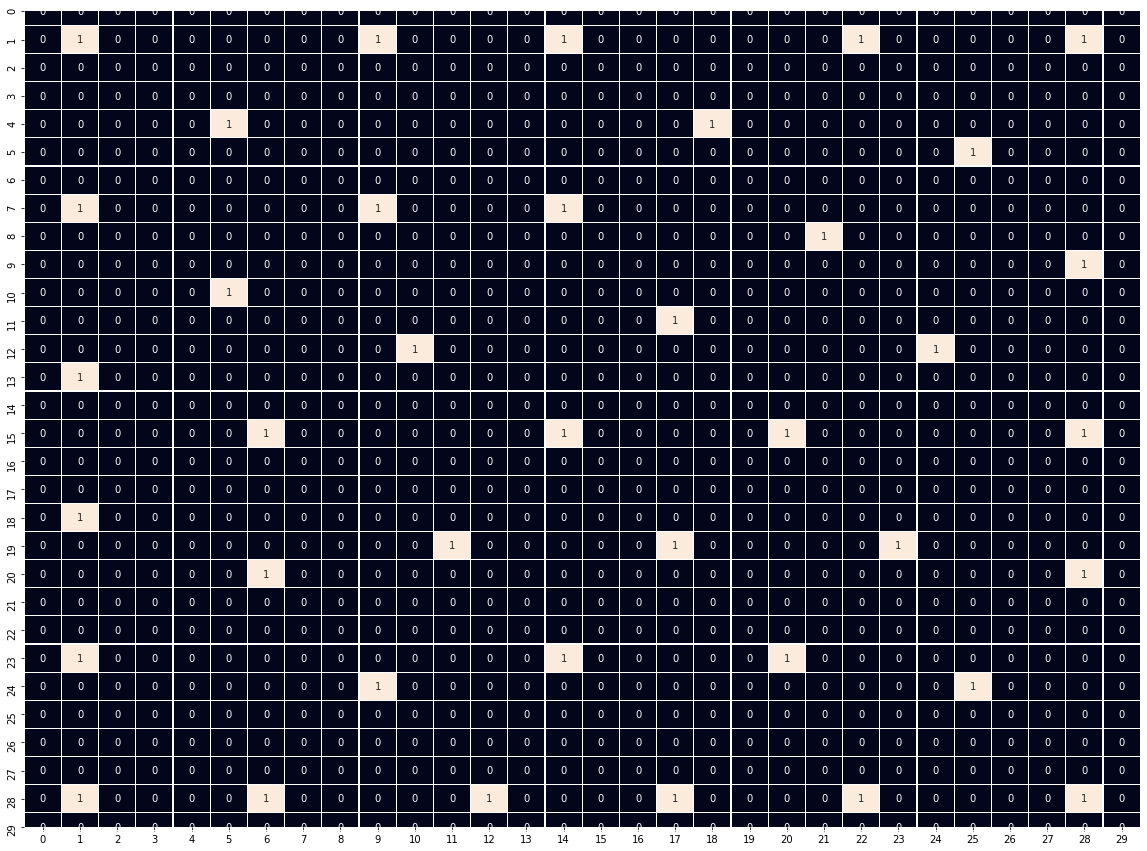

In [93]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)

In [13]:
pd.DataFrame(soln).to_csv("seat_optimization_9grid30by30.csv")

In [30]:
def constraints():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    # Constraints
    # extreme rows and columns are empty
    """for i in range(number_seats):
        if i % seating_rows == 0 or i % seating_rows == seating_rows - 1:
            solver.Add(x[i] == 0)
    
    for j in range(number_seats):
        if j < seating_columns or j > number_seats - seating_columns:
            solver.Add(x[j] == 0)"""
    
    #distance constraint
    for a, b in combinations(range(number_seats), 2):
        if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < (2 + 2*seat_width + 2*seat_width_gap) ** 2:
            solver.Add(solver.Sum([ x[a] , x[b] ]) <= 1 )
    
    
    # Objective
    objective_terms = []
    for i in range(number_seats):
        objective_terms.append(x[i])
    solver.Maximize(solver.Sum(objective_terms))

    return solver.ExportModelAsLpFormat(obfuscated=False)
    

In [31]:
print(constraints().replace('\\', '').replace(',_', ',')[:500], sep = '\n')

 Generated by MPModelProtoExporter
   Name             : assignment_mip
   Format           : Free
   Constraints      : 22968
   Variables        : 784
     Binary         : 784
     Integer        : 0
     Continuous     : 0
Maximize
 Obj: +1 auto_v_000000000 +1 auto_v_000000001 +1 auto_v_000000002 +1 auto_v_000000003 +1 auto_v_000000004 +1 auto_v_000000005 +1 auto_v_000000006 +1 auto_v_000000007 +1 auto_v_000000008 +1 auto_v_000000009 +1 auto_v_000000010 +1 auto_v_000000011 +1 auto_v_00000001


In [94]:
def get_convolutions():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    soln_matrix = np.zeros((seating_rows, seating_columns))
    #distance constraint
    for i in range(seating_rows):
        for j in range(seating_columns):
            # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
            #if x[i + j * seating_columns].solution_value() > 0.5:
            if ((x_seats[i + j * seating_columns] - x_seats[7 + 7 * seating_columns])**2 
            + (y_seats[i + j * seating_columns] - y_seats[7 + 7 * seating_columns])**2 
            < 0.25*(2 + 2*seat_width + 2*seat_width_gap) ** 2):
                #print('Worker %d assigned to task %d.  Cost = %d' %
                      #(i, j, costs[i][j]))
                    print(i,j)
                    soln_matrix[i,j] = 1
    return soln_matrix 
    

In [95]:
soln = get_convolutions()

5 6
5 7
5 8
6 5
6 6
6 7
6 8
6 9
7 5
7 6
7 7
7 8
7 9
8 5
8 6
8 7
8 8
8 9
9 6
9 7
9 8


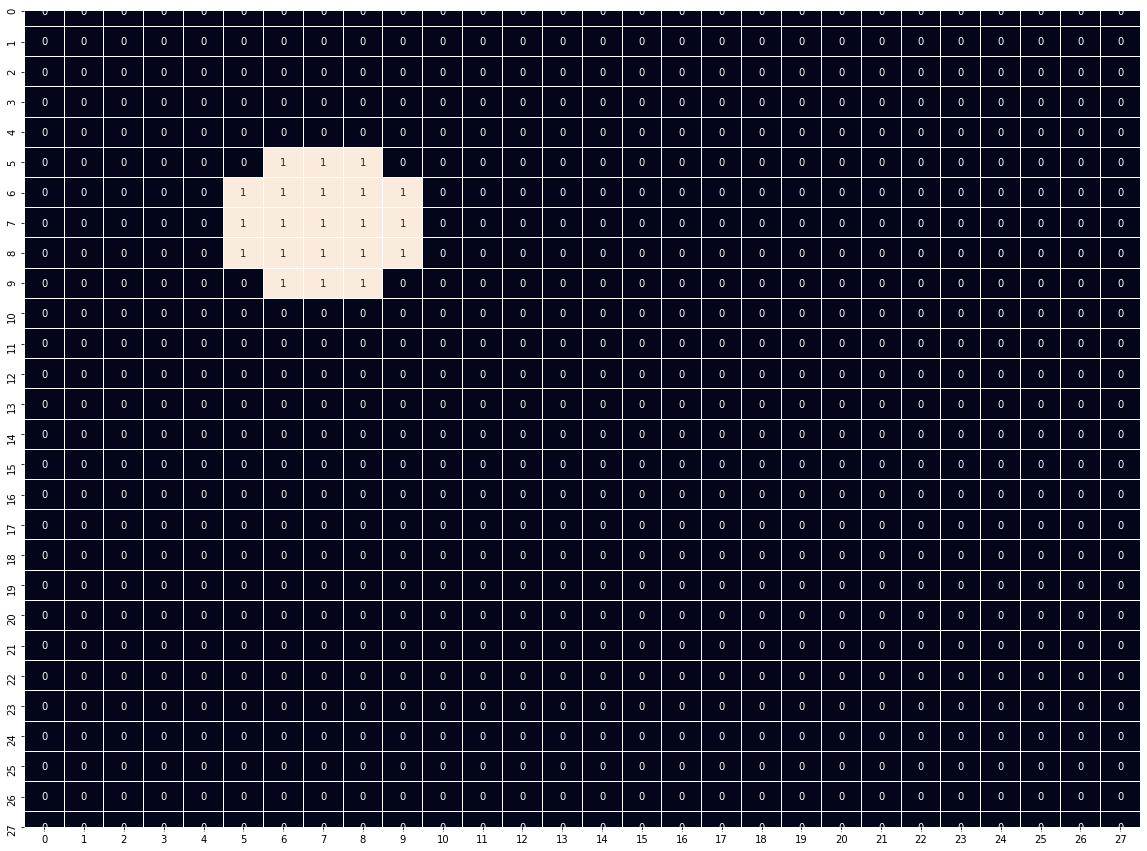

In [96]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)